In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os

In [2]:
sc.set_figure_params(frameon=False, dpi=100)

In [22]:
adata = sc.read_h5ad('/mnt/storage/Daniele/atlases/human/Human_Atlas_Harmonised.h5ad')

In [7]:
adata.obs['Is_Core'] = np.random.choice(['Core', 'Extended'], size=adata.n_obs, p=[0.7, 0.3])
adata.obs['Is_Core'] = adata.obs['Is_Core'].astype('category')
adata.obs['Is_Core']

Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0-0        Core
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0-0        Core
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0-0        Core
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0-0        Core
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0-0        Core
                                                     ...   
Ding_CCAATTTTCGAGAGCA-1-HT056P-S1PAA1-0-0-0-0-0    Extended
Ding_CCACAAAGTCCACAGC-1-HT056P-S1PAA1-0-0-0-0-0        Core
Ding_CCACACTAGGTTCCGC-1-HT056P-S1PAA1-0-0-0-0-0        Core
Ding_CCACACTCACTCAAGT-1-HT056P-S1PAA1-0-0-0-0-0        Core
Ding_CCACACTGTGAGCTCC-1-HT056P-S1PAA1-0-0-0-0-0        Core
Name: Is_Core, Length: 1000, dtype: category
Categories (2, object): ['Core', 'Extended']

# idk

In [15]:
predictions_df = pd.read_csv('final_scanVI_2.0/prediction_prob.csv', index_col='Unnamed: 0')

In [17]:
predictions_df.head()

,Acinar (REG+) Cell,Acinar Cell,Acinar Idling Cell,Adipocyte,Alpha Cell,B Cell - Activated,B Cell - Germinal Center,B Cell - Memory,B Cell - Naive,B-reg,...,Plasma Cell,Plasmablast,Schwann Cell,Smooth Muscle Cell,T-reg,Tumor-Associated Endothelial Cell,Vascular Endothelial Cell,iCAF,myCAF,γδ T Cell (Vδ1)
AAACCTGAGCTCCTTC-1_135,8.131630e-09,9.530005e-09,1.721779e-11,3.224282e-17,2.197598e-15,4.705722e-10,2.040582e-09,1.106445e-08,5.433284e-10,1.575017e-07,...,2.046798e-10,6.933432e-09,5.685674e-07,8.631618e-11,3.735870e-06,0.000010,8.740951e-10,9.637341e-09,1.728739e-07,0.000001
AAACGGGGTGCCTGCA-1_135,1.776270e-07,1.040670e-07,5.240995e-11,1.468181e-14,3.387168e-14,4.464933e-07,5.009447e-07,4.975998e-07,2.152881e-07,1.793777e-05,...,3.788860e-08,4.079345e-07,1.853298e-06,1.865392e-10,9.884333e-07,0.000046,3.001246e-08,1.190946e-07,7.803455e-07,0.000005
AAAGATGGTGAAATCA-1_135,2.541911e-12,5.203510e-12,4.340332e-11,3.200952e-15,4.887947e-16,4.365689e-07,2.612292e-07,5.738606e-05,3.057110e-07,1.878145e-05,...,8.798860e-06,1.393139e-05,2.771721e-05,5.917034e-12,9.725293e-01,0.000007,3.840489e-08,9.010895e-08,1.223065e-08,0.001577
AAAGATGTCCACGTGG-1_135,8.544323e-13,5.256291e-12,1.536505e-11,5.100055e-16,7.017189e-15,3.369587e-07,8.239564e-07,4.076046e-05,7.133966e-07,1.510534e-05,...,3.894541e-05,4.620862e-05,1.420624e-05,1.019934e-12,9.527830e-01,0.000006,7.756289e-08,8.760888e-09,1.104392e-08,0.004496
AAAGCAAAGAATAGGG-1_135,1.624786e-12,6.108879e-12,7.978993e-12,4.269332e-16,6.766596e-16,8.609054e-08,1.082548e-07,1.105765e-05,9.502275e-08,2.996172e-06,...,5.080631e-06,6.485664e-06,2.478026e-05,3.193316e-12,9.755204e-01,0.000003,1.533901e-08,1.877490e-08,2.185554e-08,0.001960


In [6]:
extension_dataset = ['EGAS00001002543','GSE194247','GSE211644','GSE229413','Lee_MET_GSE156405','Lin_MET_GSE154778','Simeone_MET_GSE205013','Zhang_GSE197177','phs001840_v1_p1', 'GSE158356']
adata.obs['Is_Core'] = np.where(adata.obs.Dataset.isin(extension_dataset), 'Extension', 'Core')

In [7]:
adata.obs.Level_4_predictions = adata.obs.Level_4_predictions.astype('category')
adata.obs.Level_4_predictions = adata.obs.Level_4_predictions.replace('nan', np.nan)

/tmp/ipykernel_1511138/1576767709.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs.Level_4_predictions = adata.obs.Level_4_predictions.replace('nan', np.nan)


In [8]:
adata.obs.Level_4_predictions.notna().sum()

352262

In [11]:
extension_adata = adata[adata.obs.Is_Core == 'Extension']

In [12]:
extension_adata

View of AnnData object with n_obs × n_vars = 352262 × 2505
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment', 'Global_Leiden', 'Treatment_Harmonized', 'Treatment_Category', 'Myeloid_leiden_0.75', 'Fibroblast_leiden_0.75', 'Lymphoid_leiden_0.75', 'Endothelial_Cell_leiden_0.75', 'Malignant_leiden_0.75', 'Ductal_Cell_leiden_0.75', 'Schwann_Cell_leiden_0.75', 'Adipocyte_leiden_0.75

# compute similarity scores

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import scanpy as sc

# Step 1: Extract latent space and labels
def get_core_latent_df(adata, embedding_key='scanvi_L4_emb', label_key='Level_4'):
    latent_df = pd.DataFrame(adata[adata.obs.Is_Core == 'Core'].obsm[embedding_key], index=adata[adata.obs.Is_Core == 'Core'].obs_names)
    latent_df['cell_type'] = adata.obs[label_key]
    return latent_df, latent_df.groupby('cell_type').mean()

def get_extended_latent_df(adata, embedding_key='scanvi_L4_emb', label_key='Level_4'):
    latent_df = pd.DataFrame(adata[adata.obs.Is_Core != 'Core'].obsm[embedding_key], index=adata[adata.obs.Is_Core != 'Core'].obs_names)
    latent_df['cell_type'] = adata.obs[label_key]
    return latent_df


# Step 2: Compute centroids
def compute_centroids(latent_df):
    return latent_df, latent_df.groupby('cell_type').mean()


def compute_euclidean_distance(latent_df, centroids):
    distances = []
    for _, row in latent_df.iterrows():
        cell_type = row['cell_type']
        embedding = row.drop('cell_type').values.reshape(1, -1)
        centroid = centroids.loc[cell_type].values.reshape(1, -1)
        
        dist = euclidean_distances(embedding, centroid)[0, 0]
        distances.append((dist, cell_type))
    df = pd.DataFrame(distances, index=latent_df.index, columns=['distance', 'cell_type'])
    df['distance'] = df['distance'] / df['distance'].max()
    return df

def run_centroid_analysis(adata, embedding_key='scanvi_L4_emb', label_key='Level_4'):
    # Get core latent space and centroids
    latent_core_raw, centroids = get_core_latent_df(adata, embedding_key=embedding_key, label_key=label_key)
    # Get extended latent space
    latent_extended = get_extended_latent_df(adata, embedding_key=embedding_key, label_key=label_key).dropna()
    
    # Restrict to common cell types
    common_cell_types = centroids.index.intersection(latent_extended['cell_type'].unique())
    centroids = centroids.loc[common_cell_types]
    latent_extended = latent_extended[latent_extended['cell_type'].isin(common_cell_types)]
    latent_core_raw = latent_core_raw[latent_core_raw['cell_type'].isin(common_cell_types)]
    
    # Compute distances to centroids
    distances_extended = compute_euclidean_distance(latent_extended, centroids)
    distances_core = compute_euclidean_distance(latent_core_raw, centroids)
    return distances_extended, distances_core, centroids




In [178]:
distances_extended, distances_core, centroids, latent_ambiguous_cells = run_centroid_analysis(adata, embedding_key='scanvi_L4_emb', label_key='Level_4')

In [179]:
distances_core['source'] = 'core'
distances_extended['source'] = 'extended'
dist_all = pd.concat([distances_core, distances_extended], axis=0)


In [211]:
adata.obs['centroid_distances'] = dist_all.distance

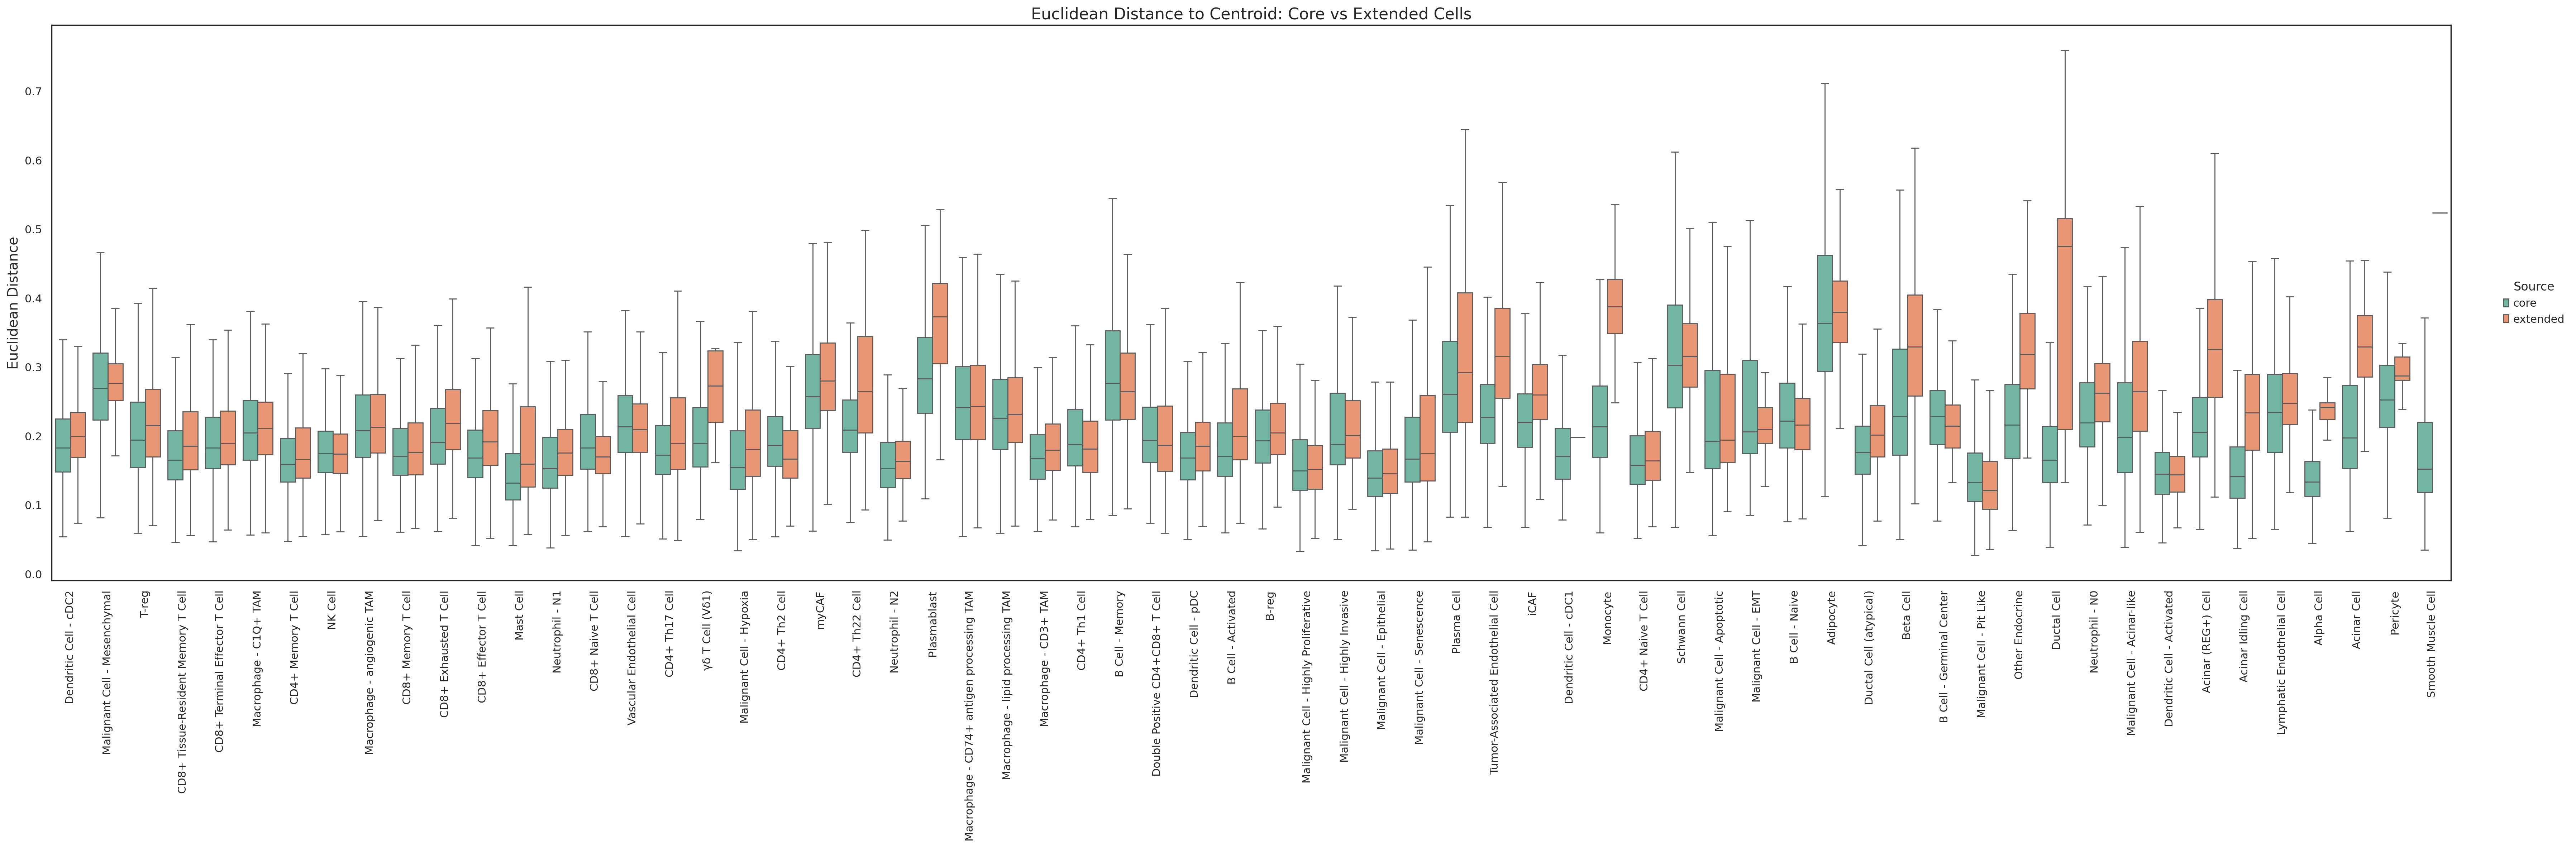

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style (no grid)
sns.set(style="white", context='notebook')

# Create the plot
plt.figure(figsize=(36, 12))
ax = sns.boxplot(
    data=dist_all,
    x='cell_type',
    y='distance',
    hue='source',
    palette='Set2',
    showfliers=False
)

# Customize plot
plt.title('Euclidean Distance to Centroid: Core vs Extended Cells', fontsize=16)
plt.xlabel('')
plt.ylabel('Euclidean Distance', fontsize=14)
plt.xticks(rotation=90)

# Remove grid explicitly
ax.grid(False)

# Move legend outside the plot
ax.legend(
    title='Source',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0,
    frameon=False
)

plt.tight_layout()
plt.show()


# compute nieghbors entropies

In [222]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
from scipy.sparse import csr_matrix
from anndata import AnnData

def compute_weighted_neighbor_label_entropy(
    adata: AnnData,
    connectivities_key: str = "connectivities",
    distances_key: str = "distances",
    label_key: str = "Level_4",
    invert_distances: bool = True,
    distance_epsilon: float = 1e-6
) -> pd.Series:
    """
    Compute Shannon entropy of neighbor labels for each cell, 
    weighting each neighbor by its (inverse) distance.

    Args:
        adata: AnnData with `.obsp[connectivities_key]` and `.obsp[distances_key]`,
              and categorical labels in `adata.obs[label_key]`.
        connectivities_key: key in adata.obsp for the sparse neighbor graph.
                            Defines which cells are “neighbors.”
        distances_key: key in adata.obsp for the sparse distance matrix.
        label_key: column in adata.obs holding the label for each cell.
        invert_distances: if True, weight = 1/(distance + epsilon);
                          if False, weight = distance.
        distance_epsilon: small constant to avoid division by zero when inverting.

    Returns:
        pd.Series of entropy values (base-2) indexed by adata.obs_names.
    """
    # sanity checks
    if connectivities_key not in adata.obsp:
        raise ValueError(f"Graph '{connectivities_key}' not found in adata.obsp.")
    if distances_key not in adata.obsp:
        raise ValueError(f"Distances '{distances_key}' not found in adata.obsp.")
    if label_key not in adata.obs:
        raise ValueError(f"Label column '{label_key}' not found in adata.obs.")

    # load sparse graphs
    conn = adata.obsp[connectivities_key].tocsr()
    dmat = adata.obsp[distances_key].tocsr()

    # prepare labels
    labels = adata.obs[label_key].astype(str).values
    unique_labels = np.unique(labels)
    label_to_idx = {lab: i for i, lab in enumerate(unique_labels)}
    label_indices = np.array([label_to_idx[lab] for lab in labels])

    ent = np.zeros(adata.n_obs, dtype=float)

    for i in range(adata.n_obs):
        nbr_idx = conn[i].indices
        if nbr_idx.size == 0:
            ent[i] = np.nan
            continue

        # get raw distances for these neighbors
        raw_d = dmat[i].data

        # compute weights
        if invert_distances:
            w = 1.0 / (raw_d + distance_epsilon)
        else:
            w = raw_d.copy()

        # accumulate weights per label
        w_counts = np.zeros(len(unique_labels), dtype=float)
        for nbr_label, weight in zip(label_indices[nbr_idx], w):
            w_counts[nbr_label] += weight

        # normalize to a probability distribution
        probs = w_counts / w_counts.sum()
        ent[i] = entropy(probs, base=2)

    return pd.Series(ent, index=adata.obs_names, name="weighted_neighbor_label_entropy")


In [223]:
adata.obs['label_entropy'] = compute_weighted_neighbor_label_entropy(adata)


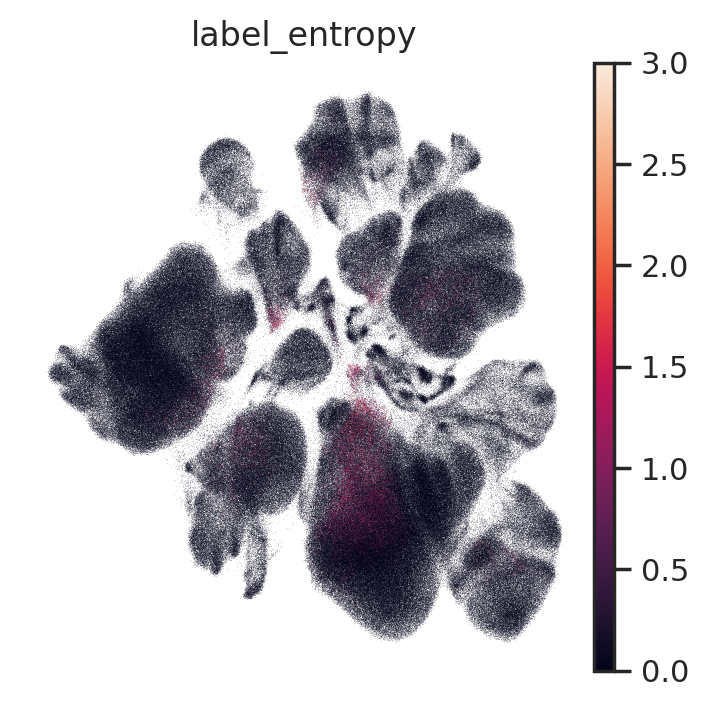

In [243]:
sc.pl.umap(adata, color = 'label_entropy', vmax = 3)

In [250]:
del plt.ylim

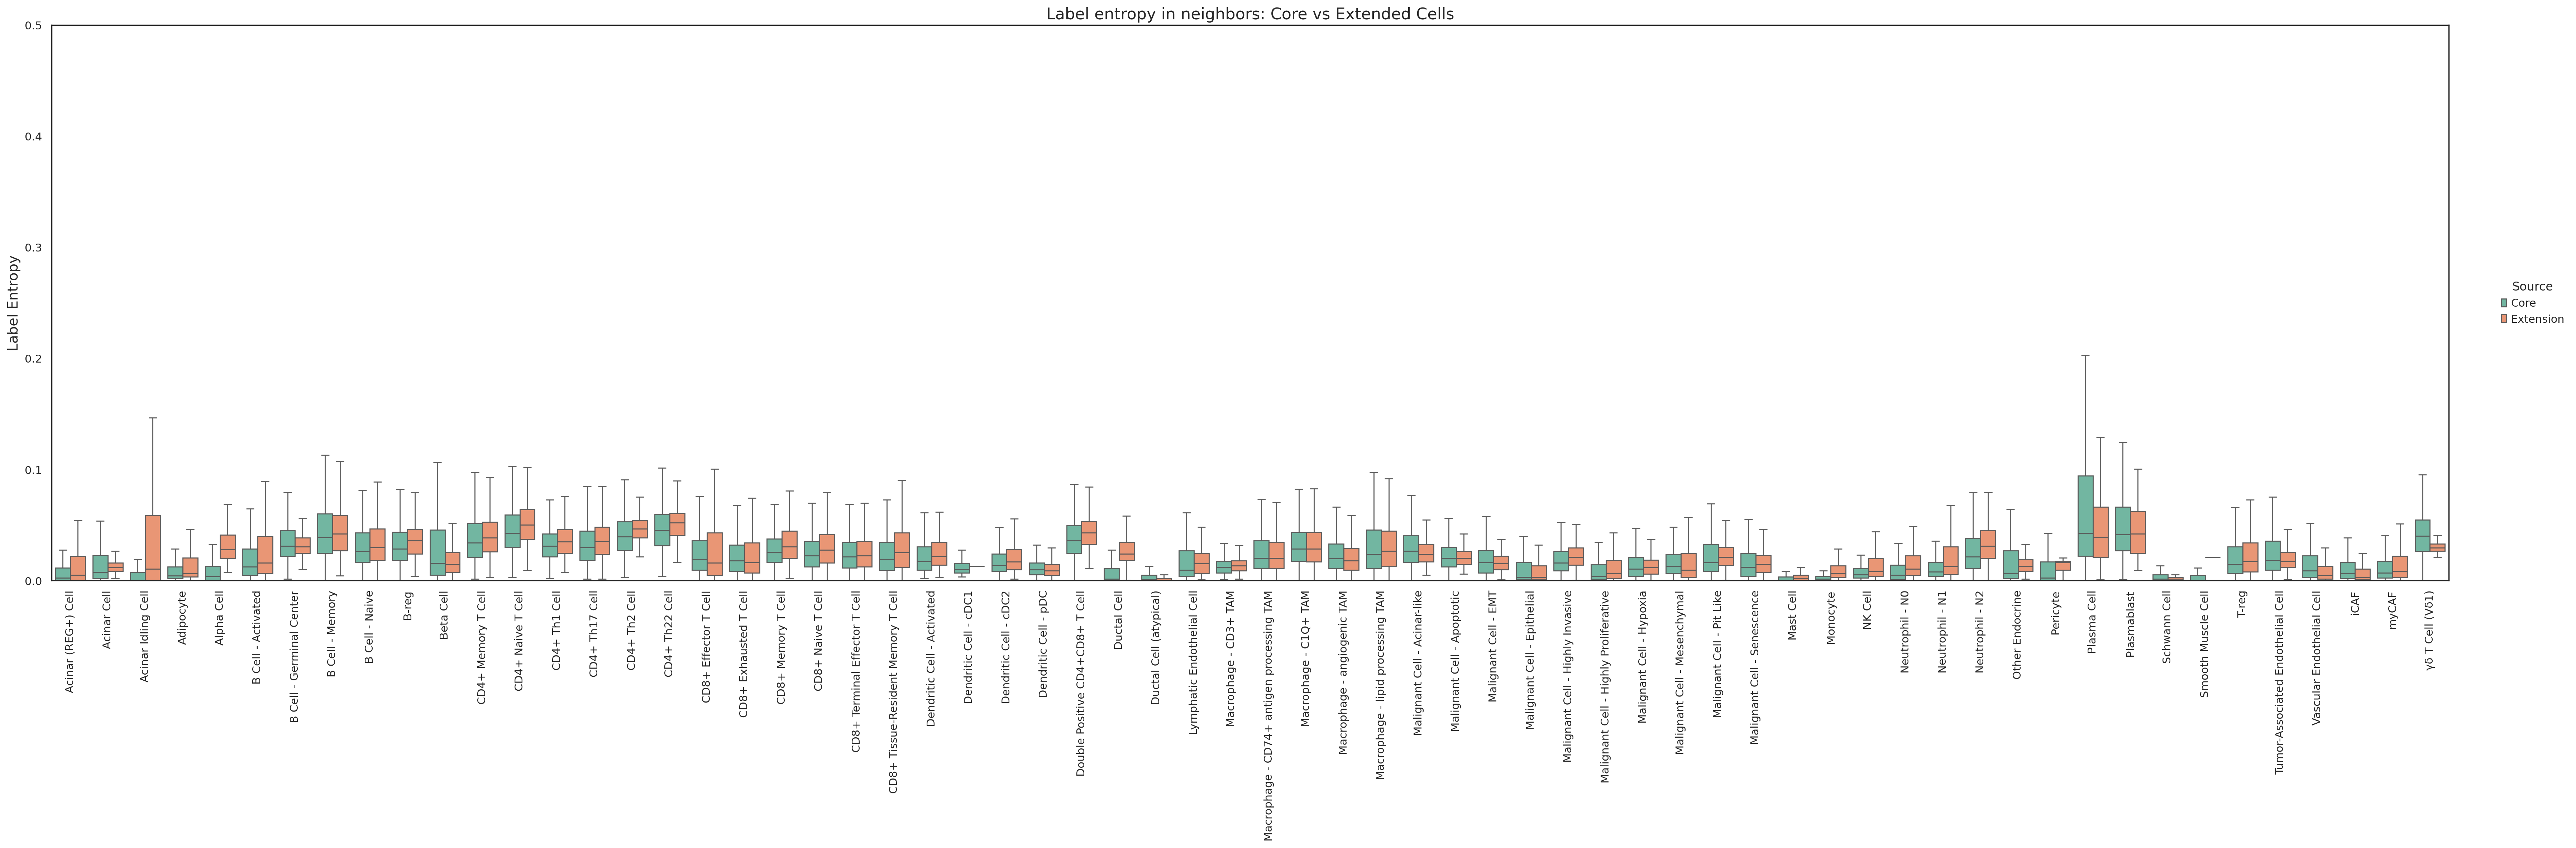

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style (no grid)
sns.set(style="white", context='notebook')

# Create the plot
plt.figure(figsize=(36, 12))
ax = sns.boxplot(
    data=adata.obs,
    x='Level_4',
    y='label_entropy',
    hue='Is_Core',
    palette='Set2',
    showfliers=False
)

# Customize plot
plt.title('Label entropy in neighbors: Core vs Extended Cells', fontsize=16)
plt.xlabel('')
plt.ylabel('Label Entropy', fontsize=14)
plt.xticks(rotation=90)

# Remove grid explicitly
ax.grid(False)

# Move legend outside the plot
ax.legend(
    title='Source',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0,
    frameon=False
)
ax.set_ylim(0, .5)

plt.tight_layout()
plt.show()


# explore ductal cells

In [263]:
duc = adata[adata.obs.Level_4 == 'Ductal Cell'].copy()

In [278]:
# mark ambiguous cells
duc.obs['ambiguous'] = duc.obs.label_entropy > (np.percentile(duc.obs.label_entropy, [90]))[0]
duc.obs['ambiguous'] = duc.obs['ambiguous'].astype('category')

In [292]:
sc.tl.rank_genes_groups(duc, groupby='ambiguous', layer='log_norm')

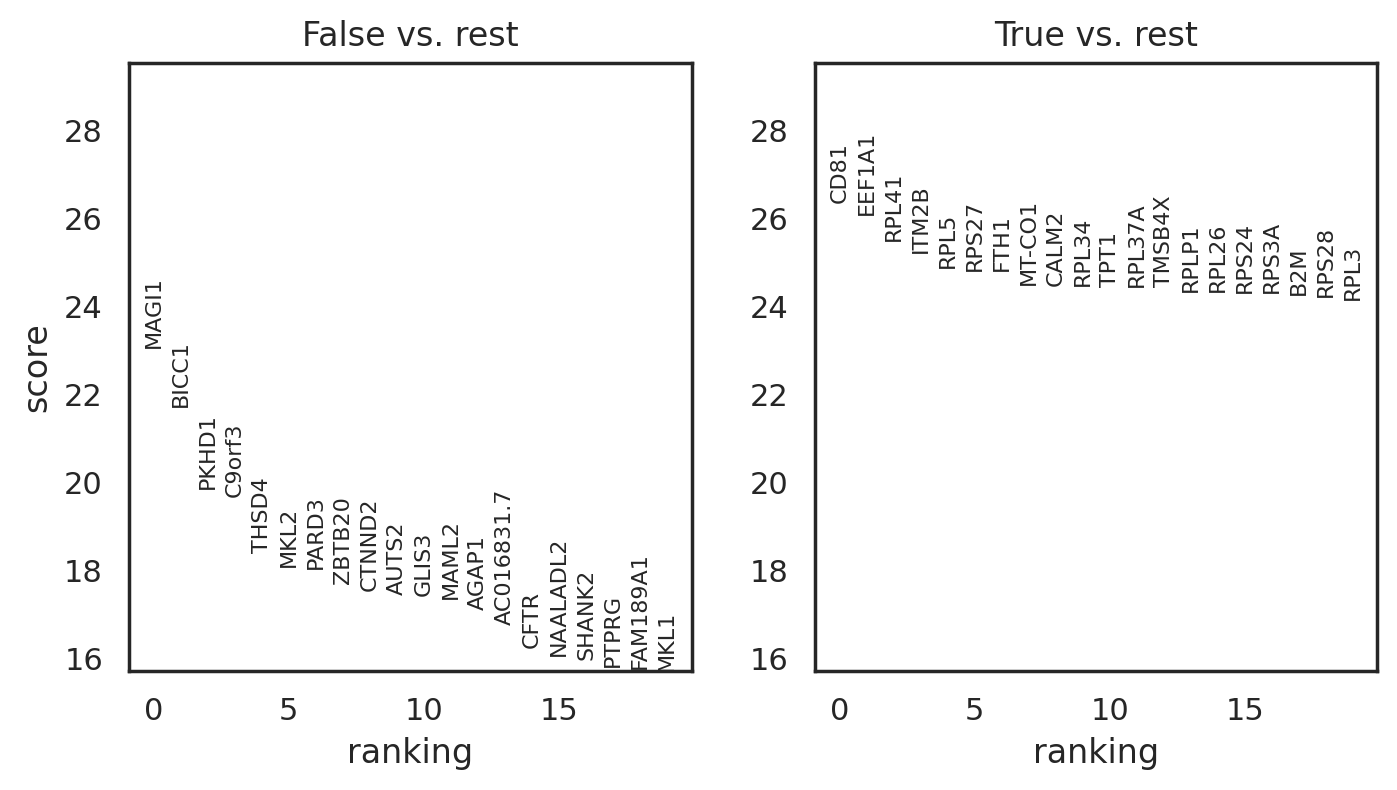

In [281]:
sc.pl.rank_genes_groups(duc)

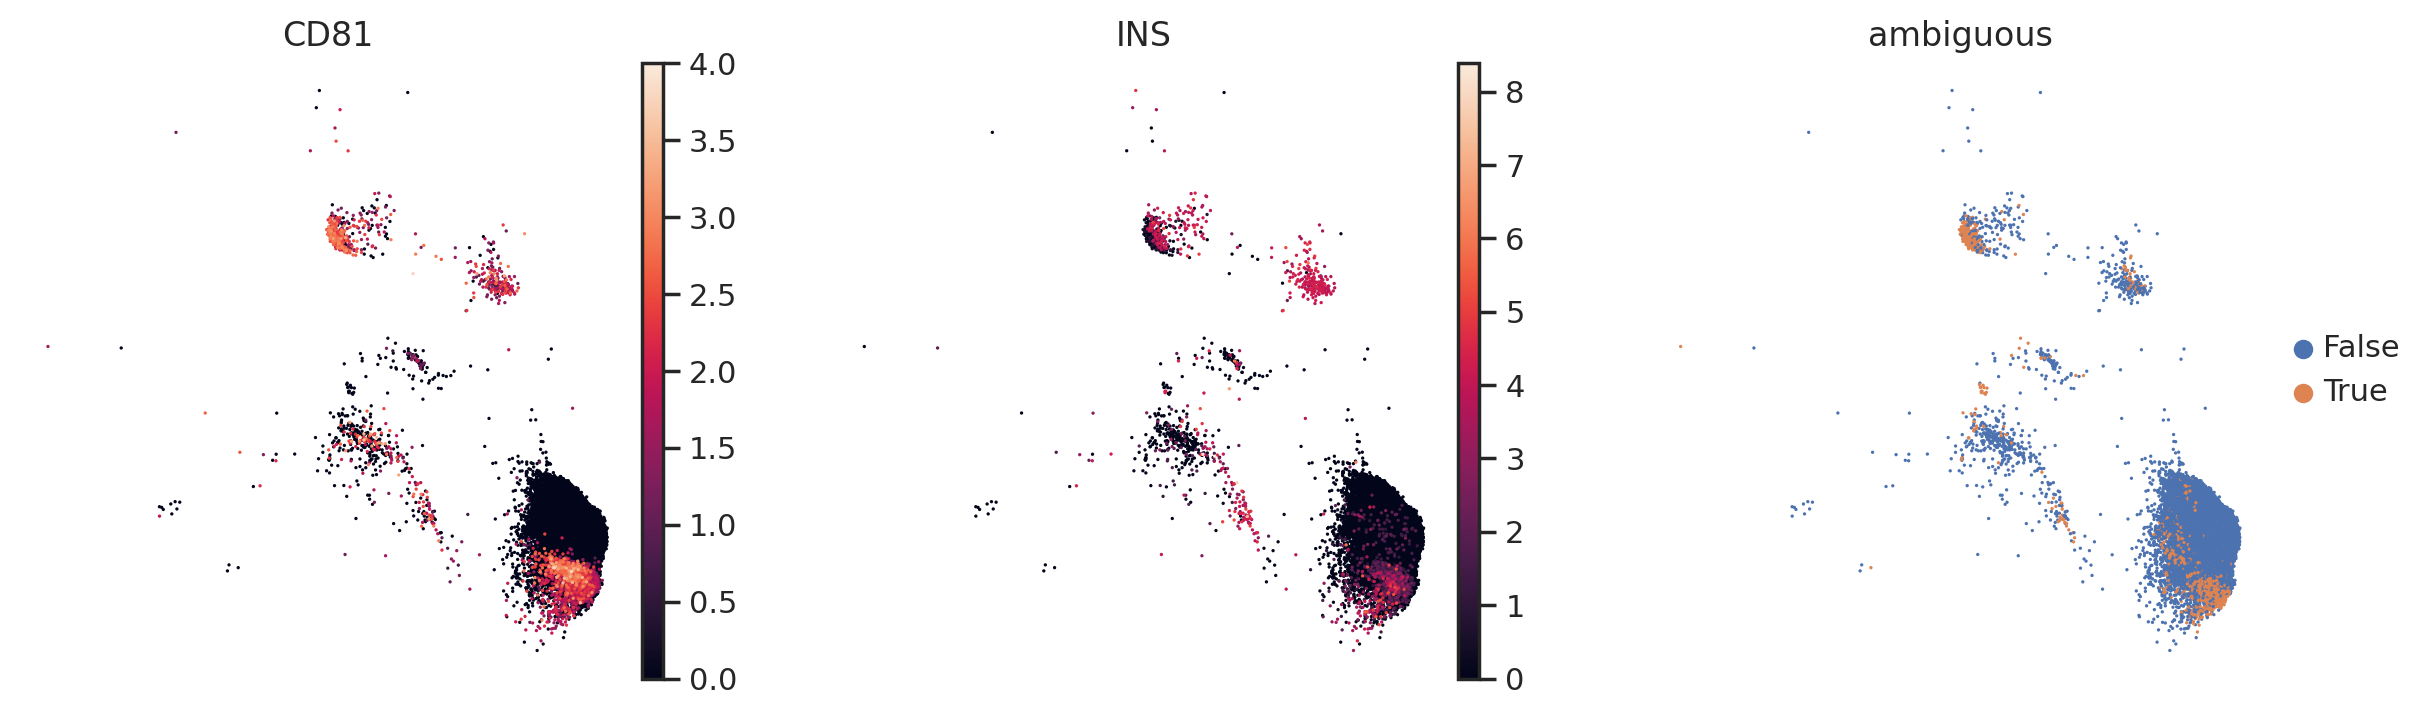

In [291]:
sc.pl.umap(duc, color = ['CD81', 'INS', 'ambiguous'], layer = 'log_norm', use_raw=False)

In [309]:
duc.obs['Level_4'] = duc.obs['Level_4'].astype(str)
duc.obs.loc[duc.obs.ambiguous, 'Level_4'] = 'Beta Cell'
duc.obs['Level_4'] = duc.obs['Level_4'].astype('category')

In [310]:
duc.obs['Level_4'].value_counts()

Ductal Cell    18911
Beta Cell       2102
Name: Level_4, dtype: int64

In [311]:
mapping = {k: v for k, v in zip(duc.obs_names, duc.obs.Level_4)}

In [313]:
adata.obs["Level_4"].value_counts()['Ductal Cell']

21013

In [314]:
adata.obs['Level_4'].update(mapping)

In [315]:
adata.obs["Level_4"].value_counts()['Ductal Cell']

18911